In [57]:
import tensorflow as tf

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((25000,), (25000,), (25000,), (25000,))

In [ ]:
train_data[0]

In [61]:
def convert_to_english(list_of_integers):
    word_index = tf.keras.datasets.imdb.get_word_index()
    # reverse the word index
    reverse_word_index = {idx : word for(word, idx)in word_index.items() } 
    # map each integer to a word and join all words together
    # Index 0, 1 and 2 are reserved for'padding','start of sequence', and'unknown'
    return" ".join(reverse_word_index.get(idx - 3, "?") for idx in list_of_integers)

In [62]:
convert_to_english(train_data[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [63]:
import numpy as np

def convert_to_multi_hot(sequences, dimension):
    output = np.zeros(shape=(sequences.shape[0], dimension), dtype=np.float32)
    # YOUR CODE HERE
    for i, sequence in enumerate(sequences):
        output[i, sequence] = 1.0

    return output

In [64]:
convert_to_multi_hot(np.array([[1, 2, 3, 1], [0, 4, 5, 4]]), dimension=6)

array([[0., 1., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1.]], dtype=float32)

In [65]:
X_train = convert_to_multi_hot(train_data, dimension=10_000)
X_test = convert_to_multi_hot(test_data, dimension=10_000)
y_train = train_labels
y_test = test_labels

X_val = X_test[:10_000]
y_val = y_test[:10_000]
X_test = X_test[10_000:]
y_test = y_test[10_000:]

In [66]:
X_train.shape, X_val.shape, X_test.shape

((25000, 10000), (10000, 10000), (15000, 10000))

In [78]:
def get_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=16, activation="relu", input_shape=(10_000,)))
    model.add(tf.keras.layers.Dense(units=16, activation="relu"))
    model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
    
    return model

In [80]:
model = get_model()
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 16)                160016    
                                                                 
 dense_33 (Dense)            (None, 16)                272       
                                                                 
 dense_34 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

In [82]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/20
49/49 [==============================] - 1s 12ms/step - loss: 0.4711 - accuracy: 0.8137 - val_loss: 0.3606 - val_accuracy: 0.8646
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2763 - accuracy: 0.9037 - val_loss: 0.2920 - val_accuracy: 0.8861
Epoch 3/20
49/49 [==============================] - 0s 7ms/step - loss: 0.2175 - accuracy: 0.9208 - val_loss: 0.2890 - val_accuracy: 0.8845
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.1839 - accuracy: 0.9334 - val_loss: 0.2883 - val_accuracy: 0.8849
Epoch 5/20
49/49 [==============================] - 0s 7ms/step - loss: 0.1618 - accuracy: 0.9428 - val_loss: 0.2989 - val_accuracy: 0.8829
Epoch 6/20
49/49 [==============================] - 0s 7ms/step - loss: 0.1432 - accuracy: 0.9503 - val_loss: 0.3302 - val_accuracy: 0.8729
Epoch 7/20
49/49 [==============================] - 0s 7ms/step - loss: 0.1296 - accuracy: 0.9550 - val_loss: 0.3348 - val_accuracy: 0.8752
Epoch 8/20
49/49 [=

In [83]:
from matplotlib import pyplot as plt

def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1, len(history.history['loss']), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()

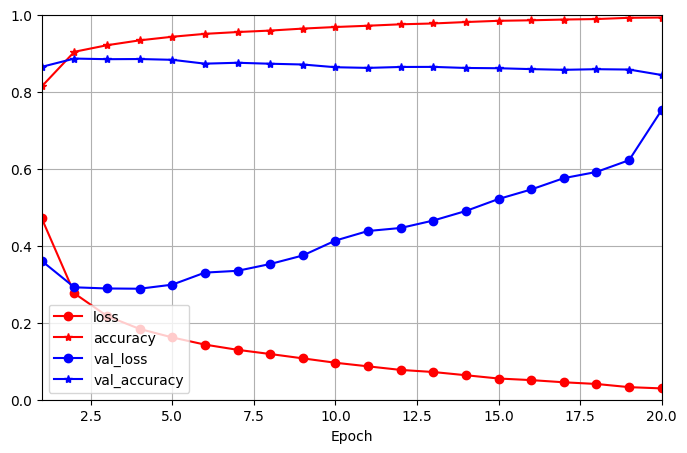

In [84]:
plot_learning_curves(history)

In [88]:
model = get_model()
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)
history = model.fit(X_train, y_train, epochs=3, batch_size=512, validation_data=(X_val, y_val))

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.4492 - accuracy: 0.8170 - val_loss: 0.3382 - val_accuracy: 0.8742
Epoch 2/3
49/49 [==============================] - 0s 7ms/step - loss: 0.2663 - accuracy: 0.9064 - val_loss: 0.2876 - val_accuracy: 0.8874
Epoch 3/3
49/49 [==============================] - 0s 7ms/step - loss: 0.2117 - accuracy: 0.9240 - val_loss: 0.2886 - val_accuracy: 0.8825


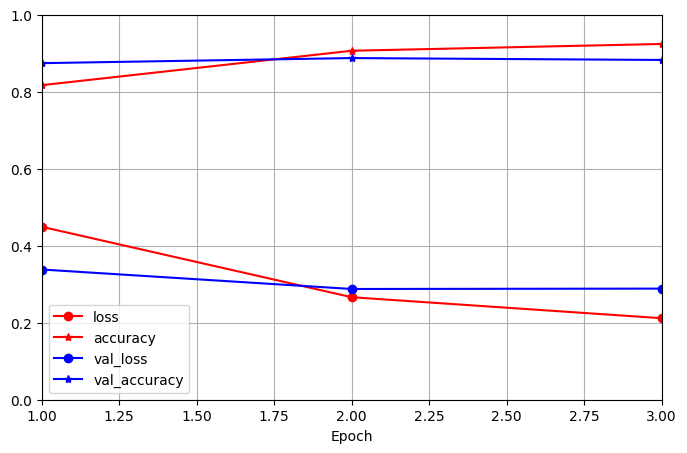

In [89]:
plot_learning_curves(history)

In [90]:
model.evaluate(X_test, y_test)

469/469 [==============================] - 0s 933us/step - loss: 0.2834 - accuracy: 0.8873


[0.2834298312664032, 0.8872666954994202]

In [98]:
def find_confidently_wrong(y_true, y_pred, top=10):
    """y_true: the true labels (0/1). Shape (n, 1)y_pred: the predictions (floats). 
    Shape(n, 1)Returns: list of indices, such that these indices have the 
    highest loss(and they are actually misclassified)"""
    assert len(y_true.shape) == len(y_pred.shape) == 2, "Rank should be 2"
    assert y_true.shape[0] == y_pred.shape[0], "Not the same length"
    assert y_true.shape[1] == y_pred.shape[1] == 1, "Second dimension should be 1"
    bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

    losses = bce(y_true, y_pred).numpy()

    return np.argsort(losses)[-top:][::-1]

In [99]:
y_test_true = y_test.reshape(-1,1)

y_test_pred = model.predict(X_test)

y_test_pred.shape

469/469 [==============================] - 0s 959us/step


(15000, 1)

In [100]:
find_confidently_wrong(y_test_true, y_test_pred)

array([  371,  3988, 14231,   775, 13849,  5727,   523,  4618, 12534,
        4967], dtype=int64)

In [101]:
import pprint

y_test_true = y_test.reshape(-1,1)
for idx in find_confidently_wrong(y_test_true, y_test_pred, top=10):
    actual_sentiment ='POSITIVE' if y_test_true[idx][0] == 1 else 'NEGATIVE'
    predicted_sentiment ='POSITIVE' if y_test_pred[idx][0] > 0.5 else 'NEGATIVE'
    # Add 10_000 because we used the first 10_000 elements as validation data
    pprint.pprint(convert_to_english(test_data[10_000 + idx]), width=80)
    print(f"is a {actual_sentiment} review but is was classified as {predicted_sentiment}.")
    print("**************************************")

('? some spoilers included br br although many ? have called this film surreal '
 'the term fits poorly here to quote from ? surreal means br br fantastic or ? '
 'imagery one ? explain to the unimaginative how many ways a ? ten year old '
 'boy at large and seeking his fortune in the ? seat of a red ? could be '
 'fantastic those curious might read james ? but if you asked said ? how he '
 "were ? behind the wheel of a sports car he'd surely protest no way what "
 'fantasies and ? the film offers mostly appear within the first fifteen '
 'minutes thereafter we get more ? of the same in an ever ? and more ? '
 'progression that far from ? soon proves predictable not that it were on the '
 'other hand literally believable but it were unfair to tax in particular with '
 'this flaw any plausible suspension of disbelief having fallen ? on the '
 "typical film ? and viewer's scale of values ever since ? of the lost ? "
 'became a blockbuster br br ? how do we know what a ? is if part of hav